In [1]:
# Sample API
import flowx
import numpy as np
import examples.poisson.simulation as simulation
flowx.__version__

'0.1.dev'

In [2]:
# Define grid parameters
nx, ny =40,40
xmin, xmax = 0.0, 1.0
ymin, ymax = 0.0, 1.0

# Define cell-centered variable names
center_vars = ['asol', 'ivar_lu','ivar_direct_inversion','ivar_conjugate_gradient','ivar_jacobi','ivar_gs', 'rvar', 'eror_lu','eror_direct_inversion','eror_conjugate_gradient','eror_jacobi','eror_gs', 'resid_lu', 'resid_direct_inversion','resid_conjugate_gradient','resid_jacobi', 'resid_gs','b_lu','b_direct_inversion','b_conjugate_gradient','b_jacobi', 'b_gs','error_jac_max','error_gs_max']

method=['lu','direct_inversion','conjugate_gradient','jacobi','gs']

# Define boundary condition for the poisson test
user_bc = 'dirichlet'

# Define boundary conditions for variable ivar
bc_type = {'ivar_lu': [user_bc, user_bc, user_bc, user_bc],'ivar_direct_inversion': [user_bc, user_bc, user_bc, user_bc],'ivar_conjugate_gradient': [user_bc, user_bc, user_bc, user_bc],'ivar_jacobi': [user_bc, user_bc, user_bc, user_bc],'ivar_gs': [user_bc, user_bc, user_bc, user_bc]}
bc_val  = {'ivar_lu': [0.0, 0.0, 0.0, 0.0],'ivar_direct_inversion': [0.0, 0.0, 0.0, 0.0],'ivar_conjugate_gradient': [0.0, 0.0, 0.0, 0.0],'ivar_jacobi': [0.0, 0.0, 0.0, 0.0],'ivar_gs': [0.0, 0.0, 0.0, 0.0]}

# Create the grid and data
grid = flowx.Grid('cell-centered', center_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type, user_bc_val=bc_val)
    
dx=grid.dx
    
    
# Create the grid and data
grid = flowx.Grid('cell-centered', center_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type, user_bc_val=bc_val)

In [3]:
simulation.get_rhs(grid, 'rvar', user_bc)
simulation.get_analytical(grid, 'asol', user_bc)

In [4]:
execution_A_lu,execution_lu=flowx.poisson.solvers(grid,user_bc,'rvar','ivar_lu','lu', 'error_jac_max','asol',verbose=False)

In [5]:
execution_A_di,execution_di=flowx.poisson.solvers(grid,user_bc,'rvar','ivar_direct_inversion','direct_inversion','error_jac_max','asol',verbose=False)


In [6]:
execution_A_cg,execution_cg=flowx.poisson.solvers(grid,user_bc,'rvar','ivar_conjugate_gradient','conjugate_gradient','error_jac_max','asol',verbose=False)


In [7]:
ites_jac,execution_jac, eror_jac, iteS_jac=flowx.poisson.solvers(grid,user_bc,'rvar','ivar_jacobi','jacobi','error_jac_max','asol',maxiter=60000,verbose=False)

In [8]:
ites_gs,execution_gs, eror_gs, iteS_gs=flowx.poisson.solvers(grid,user_bc,'rvar','ivar_gs','gs','error_gs_max','asol',maxiter=60000, verbose=False)

In [9]:
np.max(grid.get_values('ivar_lu'))

0.995890204013854

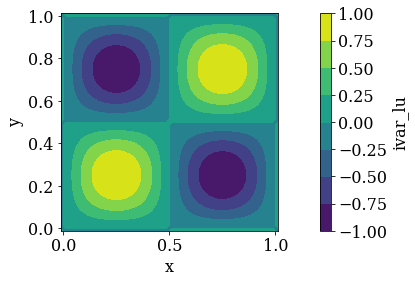

In [10]:
flowx.io.plot_contour(grid, 'ivar_lu')

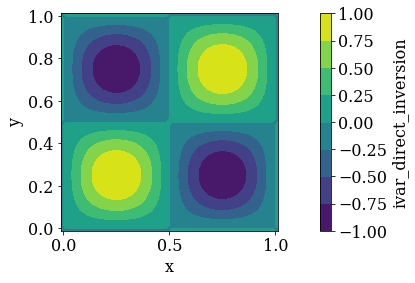

In [11]:
flowx.io.plot_contour(grid, 'ivar_direct_inversion')

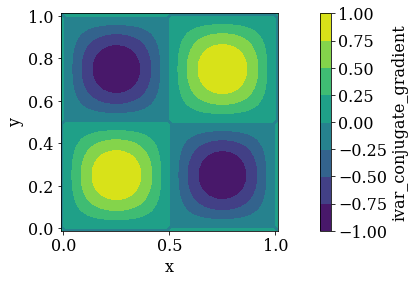

In [12]:
flowx.io.plot_contour(grid, 'ivar_conjugate_gradient')

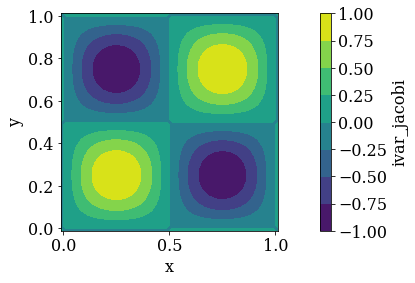

In [13]:
flowx.io.plot_contour(grid, 'ivar_jacobi')

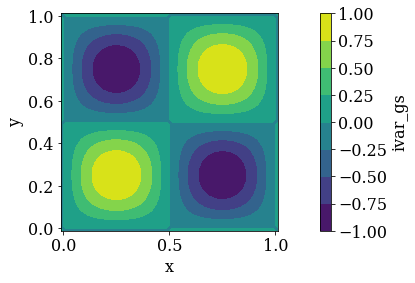

In [14]:
flowx.io.plot_contour(grid, 'ivar_gs')

In [15]:
grid.get_error('eror_lu', 'ivar_lu', 'asol')
l2_norm_lu = grid.get_l2_norm('eror_lu')
l2_norm_lu

2.3355715072090312e-05

In [16]:
grid.get_error('eror_direct_inversion', 'ivar_direct_inversion', 'asol')
l2_norm_di = grid.get_l2_norm('eror_direct_inversion')
l2_norm_di

2.3355715072090312e-05

In [17]:
grid.get_error('eror_conjugate_gradient', 'ivar_conjugate_gradient', 'asol')
l2_norm_cg = grid.get_l2_norm('eror_conjugate_gradient')
np.max(grid.get_error('eror_conjugate_gradient', 'ivar_conjugate_gradient', 'asol'))


In [18]:
grid.get_error('eror_jacobi', 'ivar_jacobi', 'asol')
l2_norm_jacobi = grid.get_l2_norm('eror_jacobi')



In [19]:
grid.get_error('eror_gs', 'ivar_gs', 'asol')
l2_norm_gs = grid.get_l2_norm('eror_gs')
l2_norm_gs

2.3355713528449374e-05